[11.776259520707978, 18.62546547014643, 15.683613223926395, 23.514119084213725, 19.13243843037322, 19.13243843037322, 26.961362802166217, 16.38765674113167, 21.584830806045883]


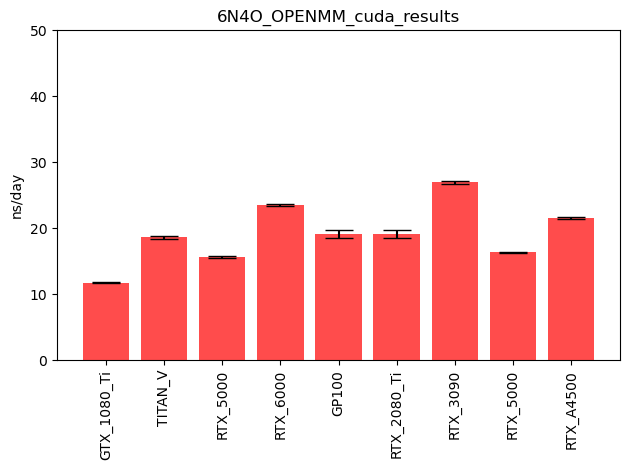

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of file names
filenames = ['../sylvaner/GTX_1080_Ti_results_openmm.dat','../case/TITAN_V_results_openmm.dat','../case/Quadro_RTX_5000_results_openmm.dat',
             '../cerebro/RTX_6000_results_openmm.dat','../cerebro/GP100_results_openmm.dat','../cerebro/RTX_2080_Ti_results_openmm.dat',
             '../rioja/RTX_3090_results_openmm.dat','../rioja/RTX_5000_results_openmm.dat','../rioja/RTX_A4500_results_openmm.dat']  # Add all your filenames here

device = ['GTX_1080_Ti','TITAN_V','RTX_5000',
          'RTX_6000','GP100','RTX_2080_Ti',
          'RTX_3090','RTX_5000','RTX_A4500']
# Initialize lists to hold the averages and standard deviations
averages = []
standard_deviations = []

# Loop through each file, calculate the average and standard deviation of the second column
for file in filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)  # Assuming whitespace delimiter, change if needed
    second_column = data.iloc[:, 0]  # Change index if the second column is not at position 1

    # Calculate average and standard deviation and append to lists
    averages.append(second_column.mean())
    standard_deviations.append(second_column.std())
# Create a bar plot with error bars
x_positions = np.arange(len(averages))
plt.bar(x_positions, averages, yerr=standard_deviations, align='center', alpha=0.7, ecolor='black', capsize=10, color='red')
print(averages)
# Add labels and title (optional)
#plt.xlabel('Files')
plt.ylabel('ns/day')
plt.title('6N4O_OPENMM_cuda_results')
plt.xticks(x_positions, device, rotation='vertical')
plt.yticks(np.arange(0, 51, 10))
plt.ylim(top=50,bottom=0)
# plt.xlim(left=0,right=8)

# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig('benchmarks_results_openmm.jpg', dpi=450, bbox_inches='tight')

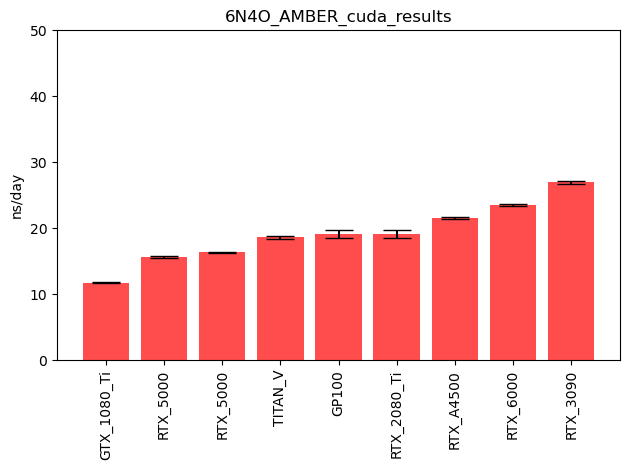

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of file names
filenames = ['../sylvaner/GTX_1080_Ti_results_openmm.dat','../case/TITAN_V_results_openmm.dat','../case/Quadro_RTX_5000_results_openmm.dat',
             '../cerebro/RTX_6000_results_openmm.dat','../cerebro/GP100_results_openmm.dat','../cerebro/RTX_2080_Ti_results_openmm.dat',
             '../rioja/RTX_3090_results_openmm.dat','../rioja/RTX_5000_results_openmm.dat','../rioja/RTX_A4500_results_openmm.dat']  # Add all your filenames here

device = ['GTX_1080_Ti','TITAN_V','RTX_5000',
          'RTX_6000','GP100','RTX_2080_Ti',
          'RTX_3090','RTX_5000','RTX_A4500']
# Initialize lists to hold the averages and standard deviations
averages = []
standard_deviations = []

# Loop through each file, calculate the average and standard deviation of the second column
for file in filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)  # Assuming whitespace delimiter, change if needed
    second_column = data.iloc[:, 0]  # Change index if the second column is not at position 1

    # Calculate average and standard deviation and append to lists
    averages.append(second_column.mean())
    standard_deviations.append(second_column.std())

# Combine data into a DataFrame and sort by averages
df = pd.DataFrame({'Device': device, 'Average': averages, 'StdDev': standard_deviations})
df_sorted = df.sort_values(by='Average')

# Create a bar plot with error bars
x_positions = np.arange(len(df_sorted))
plt.bar(x_positions, df_sorted['Average'], yerr=df_sorted['StdDev'], align='center', alpha=0.7, ecolor='black', capsize=10,color="red")

# Add labels and title (optional)
plt.ylabel('ns/day')
plt.title('6N4O_AMBER_cuda_results')
plt.xticks(x_positions, df_sorted['Device'], rotation="vertical")
plt.yticks(np.arange(0,51,10))
plt.ylim(top=50, bottom=0)

# Display the plot
plt.tight_layout()
plt.savefig('benchmarks_6N4O_OPENMM_results.jpg', dpi=450, bbox_inches='tight')
